In [ ]:
# SEOUL BIKE SHARING DEMAND by Sanskar Vyas 831989684

In [4]:
"""
This project, I am working on analysing the Bike sharing demand in the city of Seoul, South Korea
The dataset contains a count of public bicycles rented per hour in the Seoul Bike sharing system
and also contains the weather data and holiday information. I will be visualizing the following data and 
drawing coorelation between the dependent varaible: Bikes rented and independent variables: temperature, precipitation
time of the day, season, humidity, etc. 
"""

'\nThis project, I am working on the Bike sharing demand in the city of Seoul, South Korea\nThe dataset contains a count of public bicycles rented per hour in the Seoul Bike sharing system\nand also contains the weather data and holiday information\n'

In [3]:
"""
Citation:
Seoul Bike Sharing Demand. (2020).
UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.
"""


'\nCitation:\nSeoul Bike Sharing Demand. (2020).\nUCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.\n'

In [33]:
import pandas as pd

# Read the CSV file with 'ISO-8859-1' encoding
SeoulBikeData = pd.read_csv("/Users/sanskarvyas/Desktop/py/SeoulBikeData.csv", encoding='ISO-8859-1')
print(SeoulBikeData.head())

      Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  1/12/17                254     0             -5.2           37   
1  1/12/17                204     1             -5.5           38   
2  1/12/17                173     2             -6.0           39   
3  1/12/17                107     3             -6.2           40   
4  1/12/17                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                 

In [34]:
print(SeoulBikeData.describe())

       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   


In [36]:
#In this project I hope to demonstrate my analytical skills through code

In [53]:
'''
Firstly, I will explore and compare the average number of bikes that are
rented by the time of day (which is mornings, afternoons, and evenings) across 
all the four different seasons. I intend to do this by demonstrating my data visualization skills
'''

'\nFirstly, I will explore and compare the average number of bikes that are\nrented by the time of day (which is mornings, afternoons, and evenings) across \nall the four different seasons. I intend to do this by demonstrating my data visualization skills\n'

In [42]:
#Converting date coloumn to date-time format
SeoulBikeData['Date'] = pd.to_datetime(SeoulBikeData['Date'], format='%d/%m/%Y')

In [44]:
'''
Creating a new column in the data to describe the time of the day. I intend to use this new coloumn to 
manipulate data for my continued analysis
'''


'\nCreating a new column in the data to describe the time of the day. I intend to use this new coloumn to \nmanipulate data for my continued analysis\n'

In [48]:
def time_of_the_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'
SeoulBikeData['Time of Day'] = SeoulBikeData['Hour'].apply(time_of_the_day)

In [49]:
#grouping the data based on seasons

In [51]:
grouped_season = SeoulBikeData.groupby(['Seasons', 'Time of Day'])['Rented Bike Count'].mean().reset_index()

In [52]:
# Data visualization

In [54]:
import matplotlib.pyplot as plt

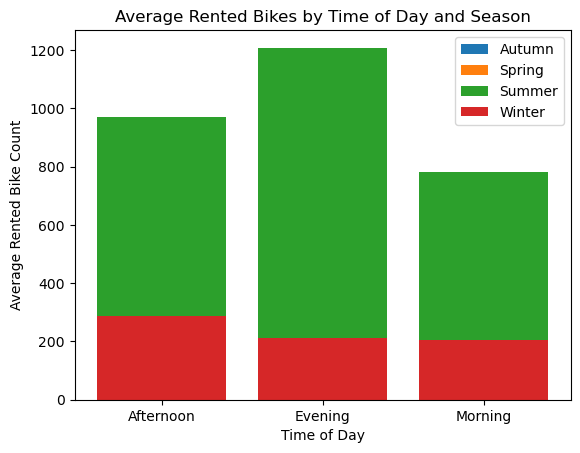

In [57]:
for season, data in grouped_season.groupby('Seasons'):
    plt.bar(data['Time of Day'], data['Rented Bike Count'], label=season)
#labels and legend
plt.xlabel('Time of Day')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bikes by Time of Day and Season')
plt.legend()

In [60]:
#Weather impact analysis

In [61]:
# The impact of temperature 

In [66]:
# Designated temperature ranges
temperature_b = [-20, 0, 10, 20, 30, 40]
temperature_designation = ['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']

# Creating a new column 'Temperature Range' based on the designated temperature
SeoulBikeData['Temperature Range'] = pd.cut(SeoulBikeData['Temperature(°C)'], bins=temperature_b, labels=temperature_designation)

# Group data by 'Temperature Range' and calculate the average bike rentals
temperature_group = SeoulBikeData.groupby('Temperature Range')['Rented Bike Count'].mean().reset_index()
print(temperature_group)


  Temperature Range  Rented Bike Count
0         Very Cold         199.521320
1              Cold         424.702287
2              Mild         765.094081
3              Warm        1119.992878
4               Hot        1106.400391


In [67]:
#Visualizing 1

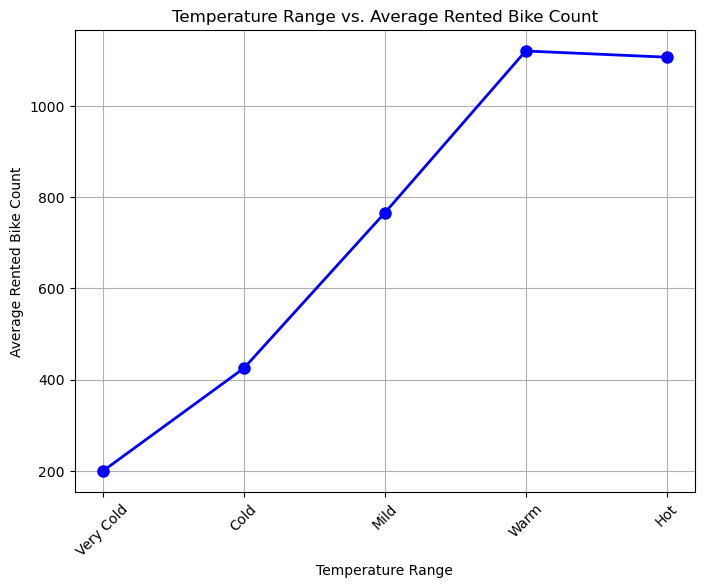

In [71]:
# Line chart: Temperature Range vs. Average Rented Bike Count
plt.figure(figsize=(8, 6))
plt.plot(temperature_group['Temperature Range'], temperature_group['Rented Bike Count'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Temperature Range')
plt.ylabel('Average Rented Bike Count')
plt.title('Temperature Range vs. Average Rented Bike Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [72]:
# The impact of humidity

In [73]:
# Designating humidity ranges
humidity_b = [0, 20, 40, 60, 80, 100]
humidity_designation = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']

# Creating a new column called humidity level
SeoulBikeData['Humidity Level'] = pd.cut(SeoulBikeData['Humidity(%)'], bins=humidity_b, labels=humidity_designation)

# Group data by 'Humidity Range' and calculate the average bike rentals
humidity_group = SeoulBikeData.groupby('Humidity Level')['Rented Bike Count'].mean().reset_index()
print(humidity_group)

  Humidity Level  Rented Bike Count
0          0-20%         703.064000
1         21-40%         759.740331
2         41-60%         842.423090
3         61-80%         725.481867
4        81-100%         346.180739


In [74]:
# Visualizing 2

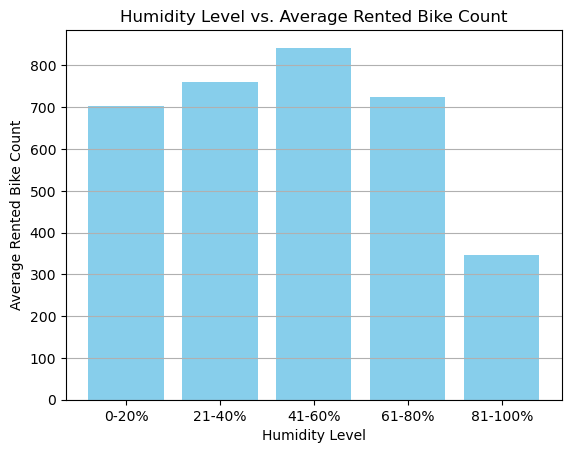

In [75]:
# Bar chart: Humidity Level vs. Average Rented Bike Count
plt.bar(humidity_group['Humidity Level'], humidity_group['Rented Bike Count'], color='skyblue')
plt.xlabel('Humidity Level')
plt.ylabel('Average Rented Bike Count')
plt.title('Humidity Level vs. Average Rented Bike Count')
plt.grid(axis='y')
plt.show()

In [76]:
# The impact of windspeed

In [77]:
# Designating wind speed ranges
wind_speed_b = [0, 1, 2, 3, 4, 5, 6, 7, 8]
wind_speed_designation = ['0-1 m/s', '1-2 m/s', '2-3 m/s', '3-4 m/s', '4-5 m/s', '5-6 m/s', '6-7 m/s', '7-8 m/s']

# Create a new column 'Wind Speed Range' 
SeoulBikeData['Wind Speed Range'] = pd.cut(SeoulBikeData['Wind speed (m/s)'], bins=wind_speed_b, labels=wind_speed_designation)

# Group data by 'Wind Speed Range' and calculate the average bike rentals
wind_speed_group = SeoulBikeData.groupby('Wind Speed Range')['Rented Bike Count'].mean().reset_index()
print(wind_speed_group)


  Wind Speed Range  Rented Bike Count
0          0-1 m/s         529.914692
1          1-2 m/s         752.200966
2          2-3 m/s         858.679622
3          3-4 m/s         785.564103
4          4-5 m/s         556.687500
5          5-6 m/s         597.241379
6          6-7 m/s         177.000000
7          7-8 m/s         950.333333


In [78]:
# Visualizing 3

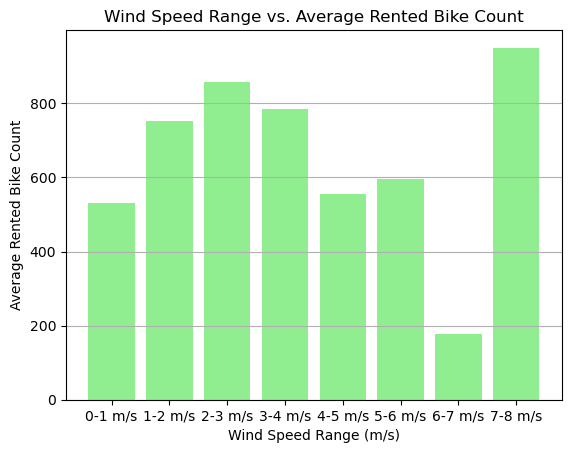

In [79]:
# Bar chart: Wind Speed Range vs. Average Rented Bike Count
plt.bar(wind_speed_group['Wind Speed Range'], wind_speed_group['Rented Bike Count'], color='lightgreen')
plt.xlabel('Wind Speed Range (m/s)')
plt.ylabel('Average Rented Bike Count')
plt.title('Wind Speed Range vs. Average Rented Bike Count')
plt.grid(axis='y')
plt.show()

In [80]:
# Creating a binary variable 'Precipitation' indicating whether there was rainfall or snowfall
SeoulBikeData['Precipitation'] = (SeoulBikeData['Rainfall(mm)'] > 0) | (SeoulBikeData['Snowfall (cm)'] > 0)

# Group data by 'Precipitation' and calculate the average bike rentals
precipitation_group = SeoulBikeData.groupby('Precipitation')['Rented Bike Count'].mean().reset_index()
print(precipitation_group)


   Precipitation  Rented Bike Count
0          False         768.412051
1           True         175.648993


In [81]:
# visualizing  4

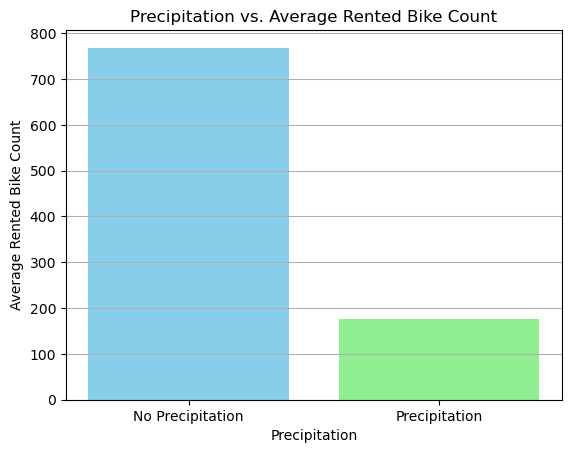

In [83]:
#Bar chart: Precipitation vs. Average Rented Bike Count
plt.bar(precipitation_group['Precipitation'], precipitation_group['Rented Bike Count'], color=['skyblue', 'lightgreen'])
plt.xlabel('Precipitation')
plt.ylabel('Average Rented Bike Count')
plt.title('Precipitation vs. Average Rented Bike Count')
plt.xticks([0, 1], ['No Precipitation', 'Precipitation'])
plt.grid(axis='y')
plt.show()

In [ ]:
# How are the bikes rented based on the day of the week?

In [87]:
# Extracting day of the week from the 'Date' column
SeoulBikeData['Day of Week'] = SeoulBikeData['Date'].dt.day_name()

In [86]:
# Group data by 'Day of Week' 
day_of_week_group = SeoulBikeData.groupby('Day of Week')['Rented Bike Count'].mean().reset_index()

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_group['Day of Week'] = pd.Categorical(day_of_week_group['Day of Week'], categories=days_order, ordered=True)
day_of_week_group = day_of_week_group.sort_values('Day of Week')
print(day_of_week_group)


  Day of Week  Rented Bike Count
1      Monday         719.635833
5     Tuesday         678.362421
6   Wednesday         714.521226
4    Thursday         743.803686
0      Friday         734.449346
2    Saturday         730.348558
3      Sunday         615.968364


In [88]:
# visualizing 5

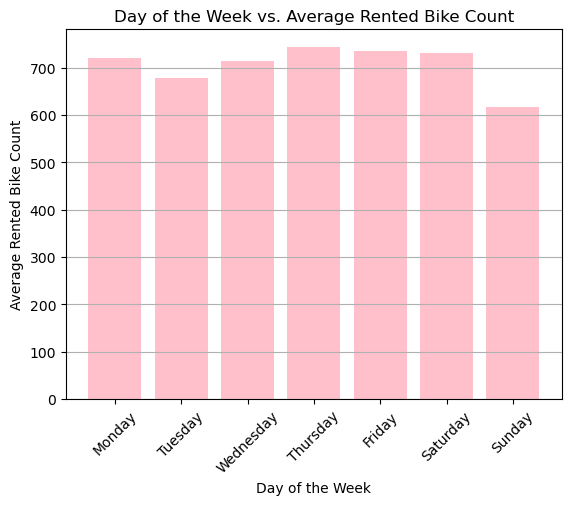

In [91]:
plt.bar(day_of_week_group['Day of Week'], day_of_week_group['Rented Bike Count'], color='pink')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rented Bike Count')
plt.title('Day of the Week vs. Average Rented Bike Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# How does each factor: Temperature in (°C) , Precipitation, Wind Speed (m/s) coorelate to the Rented bike count?

In [99]:
# Calculate correlation coefficients between features and target variable
correlations = SeoulBikeData[['Temperature(°C)', 'Precipitation', 'Wind speed (m/s)','Rented Bike Count']].corr()

# Correlation coefficients
print(correlations['Rented Bike Count'])


Temperature(°C)      0.538558
Precipitation       -0.284852
Wind speed (m/s)     0.121108
Rented Bike Count    1.000000
Name: Rented Bike Count, dtype: float64


In [ ]:
# through my expertise in STATA, I can also find their significance level.